# TP4: Decision trees & random forests
The aim of this tutorial is to get familiar with the use of decision trees and their generalizations on simple examples using `scikit-learn` tools.

## Completing your installation first
You will need to install packages `python-graphviz` first. If needed, uncomment the `conda` command below:

In [1]:
# If needed, uncomment the line below:

!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt

# Load the library with the iris dataset
from sklearn.datasets import load_iris, load_wine



# Load scikit's decision tree classifier
from sklearn import tree

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# To visualize trees
import graphviz 


# Load pandas to manipulate data frames (Excel like)
import pandas as pd

# Set random seed
np.random.seed(0)

The data for this tutorial is famous. Called, **the iris dataset**, it contains four variables measuring various parts of iris flowers of three related species, and then a fourth variable with the species name. The reason it is so famous in machine learning and statistics communities is because the data requires very little preprocessing (i.e. no missing values, all features are floating numbers, etc.).

In [3]:
iris = load_iris()

## Step 1: explore the data set
1. What is the structure of the object `iris` ?

2. Plot this dataset in a well chosen set of representations to explore the data.

In [4]:
print('wsh yaniv toi t aime bien ça')

wsh yaniv toi t aime bien ça


## Using `pandas` to manipulate the data
Pandas is great to manipulate data in a Microsoft Excel like way.

In [5]:
import pandas as pd

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 2: create training and test sets

Create a new column that for each row, generates a random number between 0 and 1, and if that value is less than or equal to .75, then sets the value of that cell as True and false otherwise. This is a quick and dirty way of randomly assigning some rows to be used as the training data and some as the test data.

In [7]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [8]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [9]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 118
Number of observations in the test data: 32


In [10]:
# Create a list of the feature column's names
features = df.columns[:4]

# View features
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [11]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['species'])[0]

## Step 3: decision trees for the iris dataset
The method `tree.DecisionTreeClassifier()` from `scikit-learn` builds decision trees objects as follows:

In [12]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train[features], y)

# Using the hwole dataset you may use directly:
#clf = clf.fit(iris.data, iris.target)

The `export_graphviz` exporter supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. Jupyter notebooks also render these plots inline automatically:

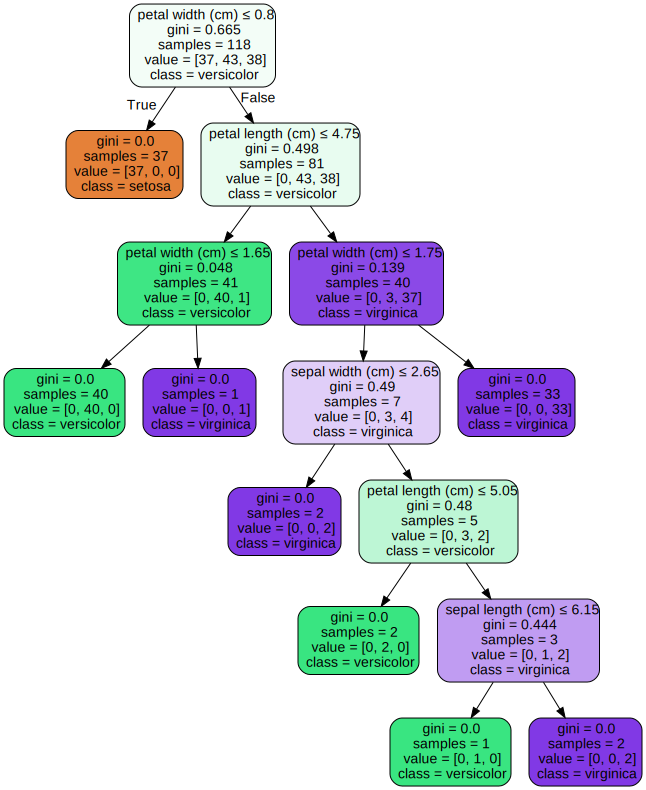

In [13]:

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

We can also export the tree in Graphviz format and  savethe resulting graph in an output file iris.pdf:

In [14]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

After being fitted, **the model can then be used to predict the class of samples**:

In [15]:
class_pred = clf.predict(iris.data[:100, :])
print(class_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\NICOLAS\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Exercise 1
1. Train the decision tree on the iris dataset and explain how one should read blocks in `graphviz` representation of the tree.

2. Plot the regions of decision with the points of the training set superimposed.

*Indication: you may find the function `plt.contourf` useful.

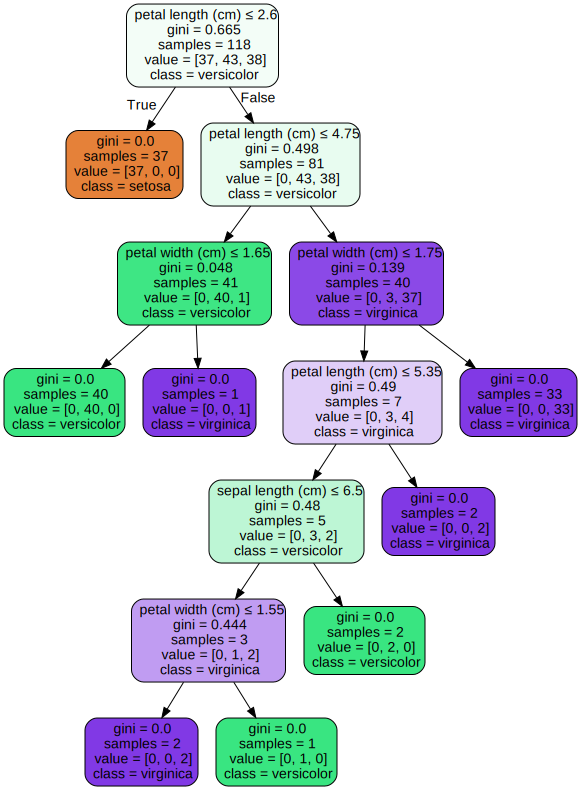

In [16]:
#train the decision tree on the iris dataset
clf= tree.DecisionTreeClassifier()
clf_full = clf.fit(train[features], y)

#show results with graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph







A node has 5 lines in it and a Leaf only as 4 lines in it.

For a leaf:
-the gini impurity index of the leaf( always 0 if there was no pruning done)
-the number of samples of the training set falling in this leaf
-the repartition of those training points in the K different training classes
-the name of the dominant class in the leaf

For a node:
-the question asked at this node
-the gini impurity index of the leaf
-the number of samples of the training set falling in this leaf
-the repartition of those training points in the K different training classes
-the name of the dominant class in the leaf

After a node, going right means that you asnwered 'True' to the question, and left means that you answered 'False'. The lower the gini impurity index is, the brightest the color is (for both nodes and leaf). There are as many colors as training classes given.

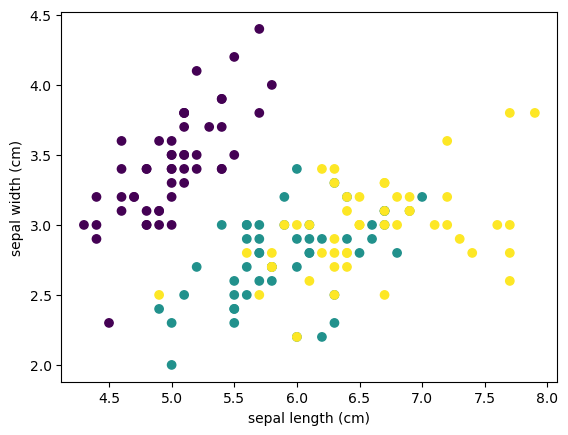

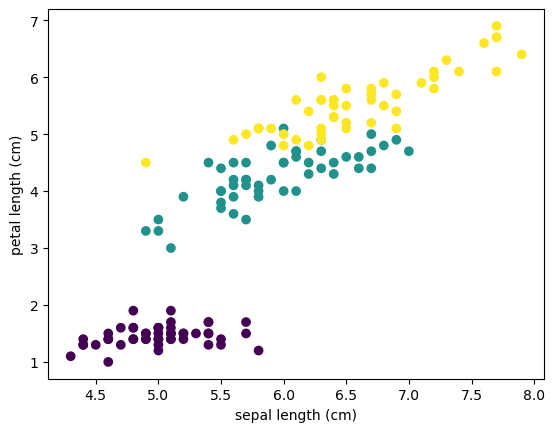

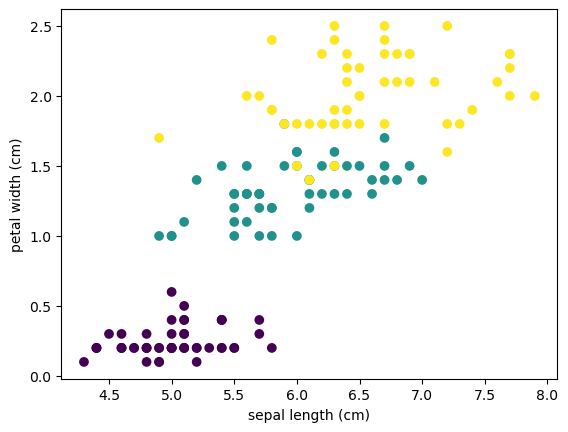

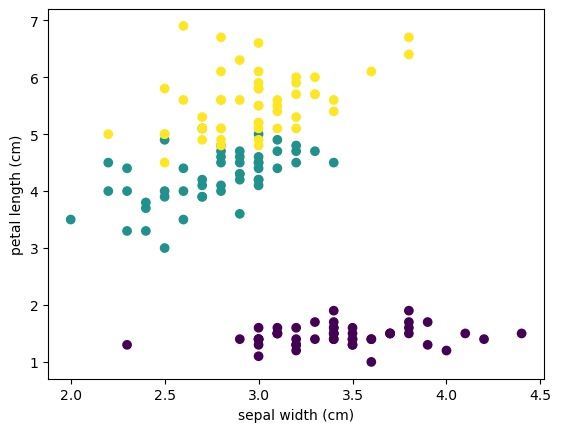

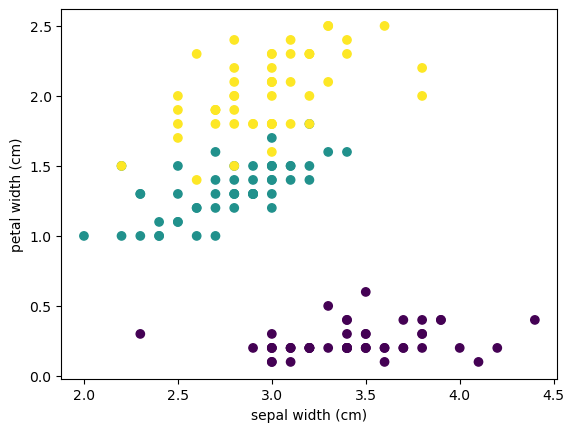

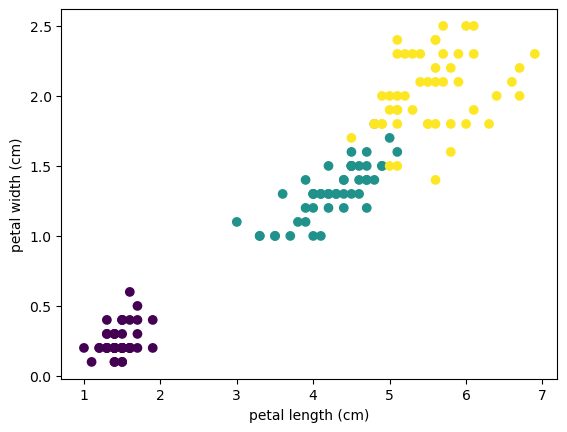

In [17]:

for i in range (3):
    for j in range(i+1,4):
        clf0 = tree.DecisionTreeClassifier()
        feat = [features[i],features[j]]
        clf0 = clf0.fit(train[feat], y)
        dot_data = tree.export_graphviz(clf0, out_file=None, 
                         feature_names=[iris.feature_names[i],iris.feature_names[j]],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
        graph = graphviz.Source(dot_data)
        graph.render("iris_attributes_"+iris.feature_names[i]+"_"+iris.feature_names[j])
        plt.figure()
        plt.scatter(iris.data[:,i],iris.data[:,j],c=iris.target)
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])
        plt.show()




## Exercise 2
1. Build 2 different trees based on a sepal features (sepal lengths, sepal widths) vs petal features (petal lengths, petal widths) only: which features are the most discriminant?

2. Compare performances with those obtained using all features.

3. Try the same as above using the various splitting criterion available, Gini's index, classification error or cross-entropy. Comment on your results. 

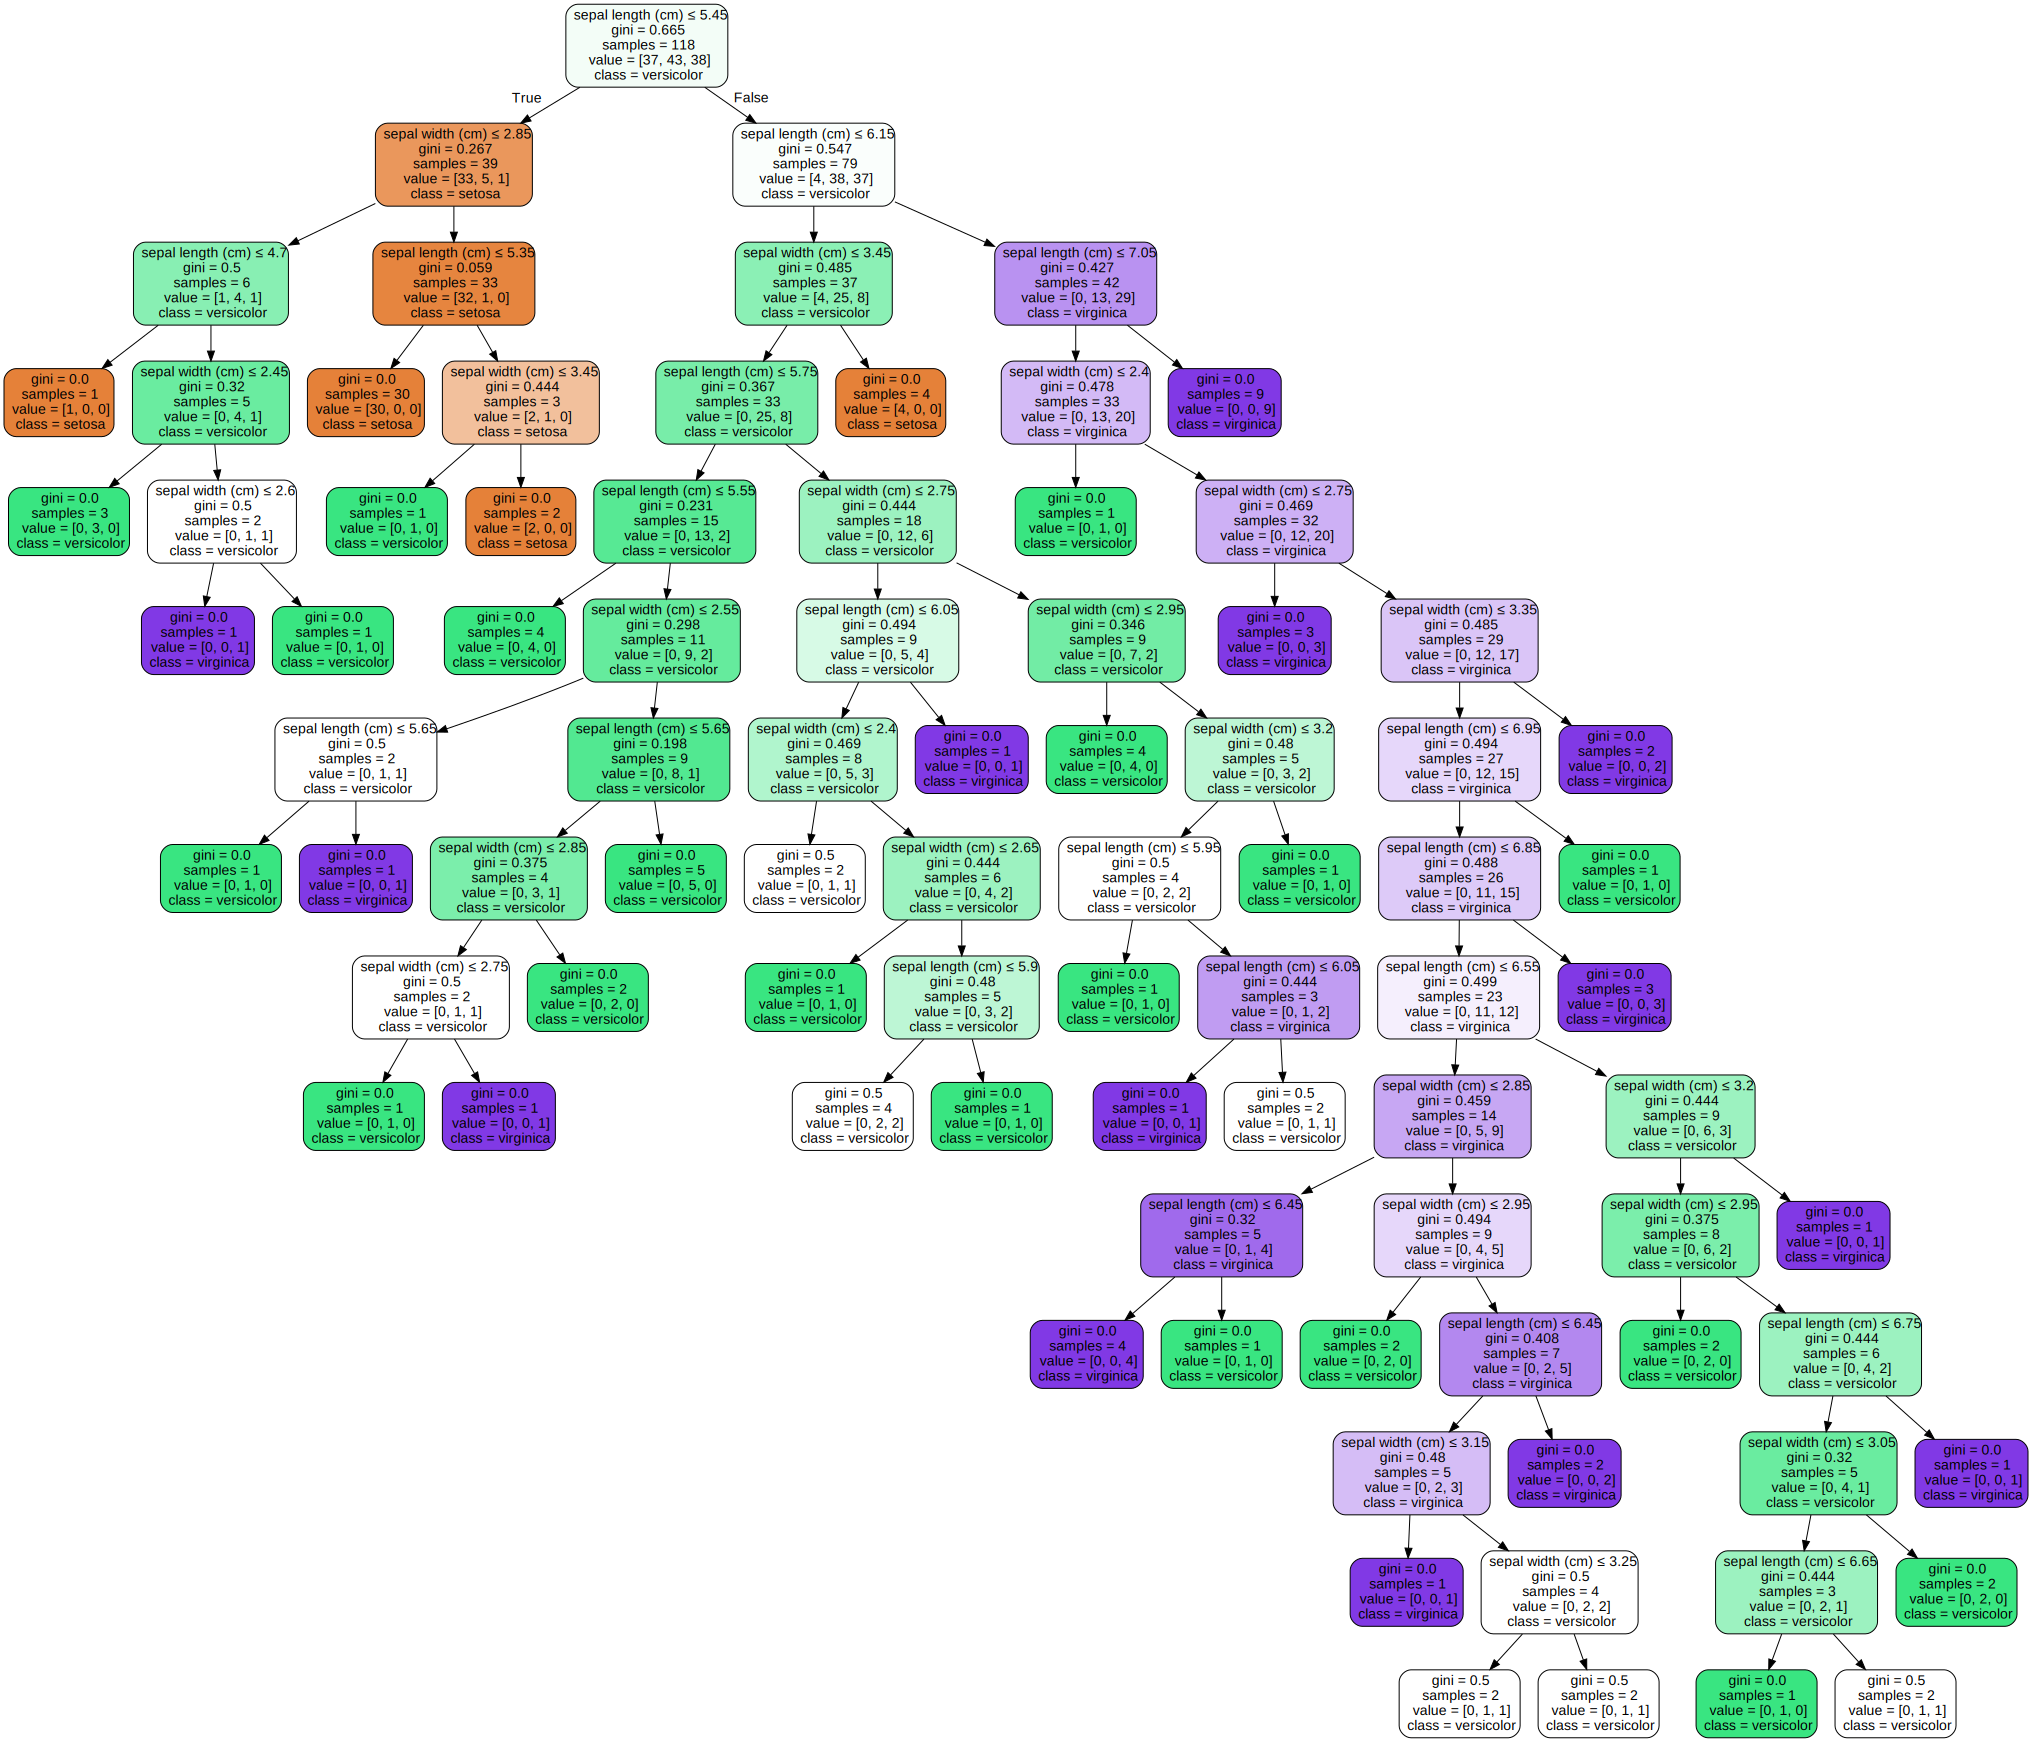

In [18]:
clf1=tree.DecisionTreeClassifier()
#train only on sepal data
clf1=clf1.fit(train[features[:2]],y)
dot_data = tree.export_graphviz(clf1, out_file=None, 
                         feature_names=[iris.feature_names[0],iris.feature_names[1]],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

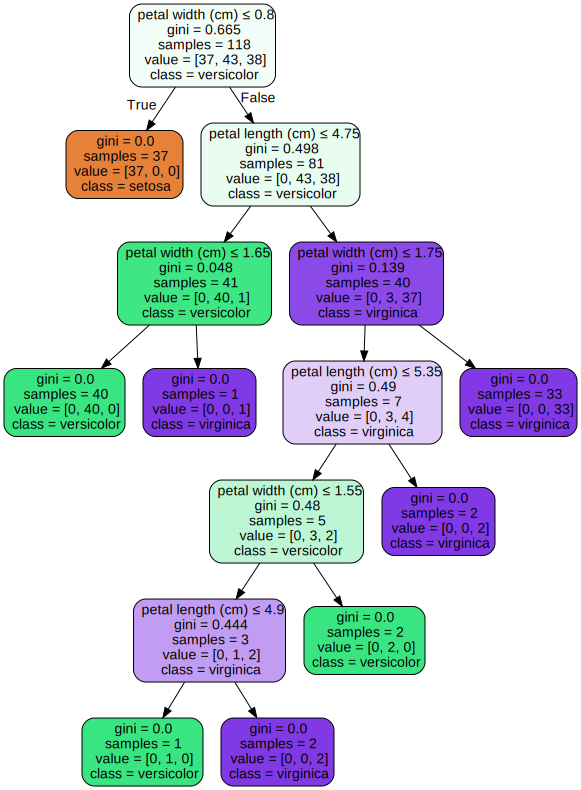

In [19]:
clf2=tree.DecisionTreeClassifier()
#train only on petal data
clf2=clf2.fit(train[features[2:]],y)
dot_data = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=[iris.feature_names[2],iris.feature_names[3]],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

The classifier using petal data is much smaller and so efficient. The one with sepal datas needs a lot more of questions, and we can be pretty sure that it is over fitting.
The petal datas are more discriminant.

In [20]:
clf1=tree.DecisionTreeClassifier()
#train only on sepal data
clf1=clf1.fit(train[features[:2]],y)

clf2=tree.DecisionTreeClassifier()
#train only on petal data
clf2=clf2.fit(train[features[2:]],y)

clf_full=tree.DecisionTreeClassifier()
#train on all data
clf_full=clf_full.fit(train[features],y)

#predict with the three classifier
class_pred1 = clf1.predict(test[features[:2]])
class_pred2 = clf2.predict(test[features[2:]])
class_pred3 = clf_full.predict(test[features])

#compute the number of errors on the test set
err1=0
err2=0
err3=0
class_pred1_names=pd.Categorical.from_codes(class_pred1, iris.target_names)
class_pred2_names=pd.Categorical.from_codes(class_pred2, iris.target_names)
class_pred3_names=pd.Categorical.from_codes(class_pred3, iris.target_names)
for i in range(len(test)):
    if class_pred1_names[i]!=test['species'].iloc[i]:
        err1+=1
    if class_pred2_names[i]!=test['species'].iloc[i]:
        err2+=1
    if class_pred3_names[i]!=test['species'].iloc[i]:
        err3+=1
print("error 1: ",err1)
print("error 2: ",err2)
print("error 3: ",err3)

error 1:  8
error 2:  3
error 3:  3


As predicted, the sepal_classifier seems to overfit and makes a lot more of error, the petal's one is doing even better than the full one.

In [21]:
criterias=['gini','entropy','log_loss']
for criteria in criterias:
    #build the three tree
    clf1=tree.DecisionTreeClassifier(criterion=criteria)
    clf1=clf1.fit(train[features[:2]],y)
    clf2=tree.DecisionTreeClassifier(criterion=criteria)
    clf2=clf2.fit(train[features[2:]],y)
    clf_full=tree.DecisionTreeClassifier(criterion=criteria)
    clf_full=clf_full.fit(train[features],y)
    #predict with the three classifier
    class_pred1 = clf1.predict(test[features[:2]])
    class_pred2 = clf2.predict(test[features[2:]])
    class_pred3 = clf_full.predict(test[features])
    #compute the number of errors
    err1=0
    err2=0
    err3=0
    
    class_pred1_names=pd.Categorical.from_codes(class_pred1, iris.target_names)
    class_pred2_names=pd.Categorical.from_codes(class_pred2, iris.target_names)
    class_pred3_names=pd.Categorical.from_codes(class_pred3, iris.target_names)

    for i in range(len(test)):
        if class_pred1_names[i]!=test['species'].iloc[i]:
            err1+=1
        if class_pred2_names[i]!=test['species'].iloc[i]:
            err2+=1
        if class_pred3_names[i]!=test['species'].iloc[i]:
            err3+=1
    print("error 1: ",err1,"    error 2: ",err2,"   error 3: ",err3)




error 1:  8     error 2:  3    error 3:  2
error 1:  7     error 2:  3    error 3:  2
error 1:  7     error 2:  3    error 3:  2


On trouve exactement les mêmes résultats en terme d'erreur peu importe le critère d'impureté pour le classifieur avec petal, pour les autres on peut trouver une erreur de plus ou de moins selon le critère.

In [22]:

clf1 = tree.DecisionTreeClassifier(criterion='gini')
clf1 = clf1.fit(train[features[:2]], y)
dot_data = tree.export_graphviz(clf1, out_file=None,
                                feature_names=[iris.feature_names[0], iris.feature_names[1]],
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph_gini = graphviz.Source(dot_data)
graph_gini.render('iris_tree_gini', format='png', view=True)

clf2 = tree.DecisionTreeClassifier(criterion='entropy')
clf2 = clf2.fit(train[features[:2]], y)
dot_data = tree.export_graphviz(clf2, out_file=None,
                                feature_names=[iris.feature_names[0], iris.feature_names[1]],
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph_entropy = graphviz.Source(dot_data)
graph_entropy.render('iris_tree_entropy', format='png', view=True)

clf3 = tree.DecisionTreeClassifier(criterion='log_loss')
clf3 = clf3.fit(train[features[:2]], y)
dot_data = tree.export_graphviz(clf3, out_file=None,
                                feature_names=[iris.feature_names[0], iris.feature_names[1]],
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph_log_loss = graphviz.Source(dot_data)
graph_log_loss.render('iris_tree_log_loss', format='png', view=True)
;


''

>This cell compute the tree for each impurity index for the sepal data only and opens them directly in your picture browser for you to compare them. We could have done the same for the full dataset and the petal data only one but we didn't want to flood your screen upon running the notebook.

>So for the sepal data only, we can see that the log_loss and entropy trees are very similar in term of general structure but also in term of value for the question at each node. The left part of the trees are basically identical and the right part of the trees only have a few differences but led to the exact same results. Both trees are very deep and most likely overfit ( we can also see it above with their error on the test set ). The gini tree, has a max-depth of 12 (against 15 for the other two) but it seems a bit 'wider'.The other twos were deep but only on a certain branch whereas the gini one is a bit shorter but reachs its max depth (or almost max-dpeth)on more branches. It basically overfit too.

### Going further ahead (not mandatory) 
Try the same approach adapted to another toy dataset from `scikit-learn` described at:
http://scikit-learn.org/stable/datasets/index.html

Play with another dataset available at:
http://archive.ics.uci.edu/ml/datasets.html

>> Those two links are both on error 404.

## Step 4: Random forests
Go to 

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

for a documentation about the `RandomForestClassifier` provided by `scikit-learn`.

Since target values must be integers, we first need to transform labels into numbers as below.

In [23]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['species'])[0]

# View target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [24]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
rf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
rf.fit(train[features], y)

RandomForestClassifier(n_jobs=2, random_state=0)

**Make predictions** and create actual english names for the plants for each predicted plant class:

In [25]:
preds = rf.predict(test[features])
preds_names = pd.Categorical.from_codes(preds, iris.target_names)
preds_names

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 32
Categories (3, object): ['setosa', 'versicolor', 'virginica']

### Create a confusion matrix

In [26]:
# Create confusion matrix unsing pandas:
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


## Feature selection using random forests byproducts

One of the interesting use cases for random forest is feature selection. One of the byproducts of trying lots of decision tree variations is that you can examine which variables are working best/worst in each tree.

When a certain tree uses one variable and another doesn't, you can compare the value lost or gained from the inclusion/exclusion of that variable. The good random forest implementations are going to do that for you, so all you need to do is know which method or variable to look at.

### View feature importance
While we don't get regression coefficients like with ordinary least squares (OLS), we do get a score telling us how important each feature was in classifying. This is one of the most powerful parts of random forests, because we can clearly see that petal width was more important in classification than sepal width.


In [27]:
# View a list of the features and their importance scores
list(zip(train[features], rf.feature_importances_))

[('sepal length (cm)', 0.08474010289429795),
 ('sepal width (cm)', 0.022461263894393204),
 ('petal length (cm)', 0.4464851467243143),
 ('petal width (cm)', 0.4463134864869946)]

## Exercise 3
1. Comment on the feature importances with respect to your previous observations on decision trees above.

2. Extract and visualize 5 trees belonging to the random forest using the attribute `estimators_` of the trained random forest classifier. Compare them. *Note that you may code a loop on extracted trees.*

3. Study the influence of parameters like `max_depth`, `min_samples_leaf` and `min_samples_split`. Try to optimize them and explain your approach and choices.

4. How is estimated the prediction error of a random forest ?
*Indication: have a look at parameter `oob_score`.*
What are out-of-bag samples ?

5. What should you do when classes are not balanced in the dataset ? (that is when there are much more examples of one class than another)

>1.
>Comme observé précédemment, il semble que les informations liés au sepal ne soit pas aussi utile que celle des pétales. Cela correspond à ce que nous avions observé, nous pouvions avoir un classifieur presque aussi bon qu ele complet en utilisant uniquement les informations lié aux pétales, et avec un claissifieur n'utilisant que les informations des sépales, l'erreur était bien plus forte.

In [28]:
import random
random.seed(0)
#extract 5 trees from the forest
list_tree=random.sample(range(0,rf.n_estimators+1),5)
for i in list_tree:
    dot_data = tree.export_graphviz(rf.estimators_[i], out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render("rf_tree_"+str(i), format='png', view=True)


> As seen in class, the trees of the random forest are rather simple, not deeper than 6, have very different structure (from the first question to the end it can be totally different), don't have the same number of samples (and furthermore the same samples) and they all achieve pure leaf with their training data.

In [32]:
max_depth=[1,2,3,4,5,6,7,8,9,10]
min_samples_split=[2,3,4,5,6,7,8]
min_samples_leaf=[1,2,3,4,5,6,7,8]

#we do a grid search on those parameters with random forest
errors=[]
for depth in max_depth:
    for split in min_samples_split:
        for leaf in min_samples_leaf:
            rf = RandomForestClassifier(n_jobs=2, random_state=0,max_depth=depth,min_samples_split=split,min_samples_leaf=leaf)
            rf.fit(train[features], y)
            preds = rf.predict(test[features])
            preds=pd.Categorical.from_codes(preds, iris.target_names)
            err=0
            for i in range(len(preds)):
                if preds[i]!=test['species'].iloc[i]:
                    err+=1
            errors.append(err)
print(errors)

#find the best parameters
print('min error: ',np.min(errors),'for the following parameters')
best_param=np.argmin(errors)
print('max_depth: ',max_depth[int(best_param/(len(min_samples_split)*len(min_samples_leaf)))])
print('min_samples_split: ',min_samples_split[int((best_param%(len(min_samples_split)*len(min_samples_leaf)))/len(min_samples_leaf))])
print('min_samples_leaf: ',min_samples_leaf[int((best_param%(len(min_samples_split)*len(min_samples_leaf)))%len(min_samples_leaf))])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 

This approach is not very effective, there are so much trees in our forest that every forest achieve great results whatever the parameters are, by reducing the number of trees we may have a clearer results, but for now let's try using the oob_score to find the best values.

In [40]:
#do the same but with oob_score
scores=[]
for depth in max_depth:
    for split in min_samples_split:
        for leaf in min_samples_leaf:
            rf = RandomForestClassifier(n_jobs=2, random_state=0,max_depth=depth,min_samples_split=split,min_samples_leaf=leaf,oob_score=True)
            rf.fit(train[features], y)
            
            scores.append(rf.oob_score_)
best_param=np.argmax(scores)
print('max score: ',np.max(scores),'for the following parameters')
print('max_depth: ',max_depth[int(best_param/(len(min_samples_split)*len(min_samples_leaf)))])
print('min_samples_split: ',min_samples_split[int((best_param%(len(min_samples_split)*len(min_samples_leaf)))/len(min_samples_leaf))])
print('min_samples_leaf: ',min_samples_leaf[int((best_param%(len(min_samples_split)*len(min_samples_leaf)))%len(min_samples_leaf))])

max score:  0.9661016949152542 for the following parameters
max_depth:  6
min_samples_split:  4
min_samples_leaf:  1


>4

>5
>You should either try to add/generate data for the underreprenseted classes or reduced the number of used datapoints from the overrepresented class in order not to skew our forest.

## Step 5: a small example of regression using random forests
Random forest is capable of learning without carefully crafted data transformations. Take the the $f(x) = \sin(x)$ function for example.

Create some fake data and add a little noise.

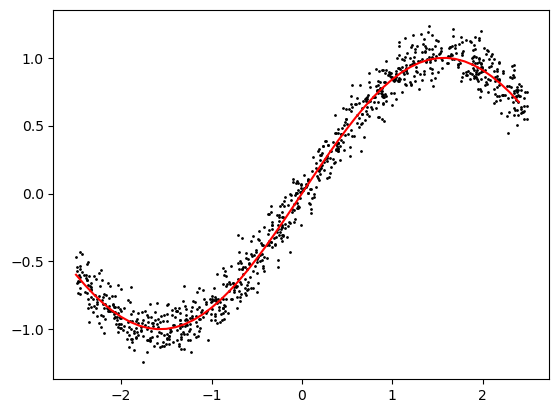

In [46]:
x = np.random.uniform(-2.5, 2.5, 1000)
y = np.sin(x) + np.random.normal(0, .1, 1000)

plt.plot(x,y,'ko',markersize=1,label='data')
plt.plot(np.arange(-2.5,2.5,0.1),np.sin(np.arange(-2.5,2.5,0.1)),'r-',label='ref')
plt.show()

If we try and build a basic linear model to predict y using x we end up with a straight line that sort of bisects the sin(x) function. Whereas if we use a random forest, it does a much better job of approximating the sin(x) curve and we get something that looks much more like the true function.

Based on this example, we will illustrate how the random forest isn't bound by linear constraints.

## Exercise 4
1. Apply random forests on this dataset for regression and compare performances with ordinary least squares regression.
*Note that ordinay least square regression is available thanks to:
from sklearn.linear_model import LinearRegression*

2. Comment on your results.

### Indications:
You may use half of points for training and others to test predictions. Then you will have an idea of how far the random forest predictor fits the sinus curve.

To this aim, you will need to use the model `RandomForestRegressor`. Be careful that when only 1 feature `x` is used as an input, you will need to reshape it by `x.reshape(-1,1)` when using methods `fit` and `predict`.

In [52]:
regrf = RandomForestRegressor(n_estimators=30, max_depth=4)
regrf.fit(x[0::2].reshape(-1, 1),y[0::2])

RandomForestRegressor(max_depth=4, n_estimators=30)

In [53]:
from sklearn.linear_model import LinearRegression
regrl = LinearRegression()
regrl.fit(x[0::2].reshape(-1, 1),y[0::2])


LinearRegression()

### Indication
One clever way to compare models when using `scikit-learn`is to make a loop on models as follows:

In [55]:
models = [regrf, regrl]
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=np.arange(-2.5,2.5,0.001), y=np.sin(np.arange(-2.5,2.5,0.001)),
                    mode='lines',
                    name='ref'))
for model in models:
    pred=model.predict(x[1::2].reshape(-1, 1))
    diff=np.abs(y[1::2]-pred)
    print('mean error: ',np.mean(diff))
    fig.add_trace(go.Scatter(x=x[1::2], y=pred,
                    mode='markers',
                    name=model.__class__.__name__))
fig.show()


mean error:  0.09157250958184605
mean error:  0.2514561421250426


## Documentation

### Decision trees
http://scikit-learn.org/stable/modules/tree.html

### Random forests
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Plot decision surface : using `plt.contourf`
http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py


## Pruning trees: not available in scikit-learn.
Since post-pruning of tree is not implemented in scikit-learn, you may think of coding your own pruning function. For instance, taking into account the numer of samples per leaf as proposed below:

In [ ]:
# Pruning function (useful ?)
def prune(decisiontree, min_samples_leaf = 1):
    if decisiontree.min_samples_leaf >= min_samples_leaf:
        raise Exception('Tree already more pruned')
    else:
        decisiontree.min_samples_leaf = min_samples_leaf
        tree = decisiontree.tree_
        for i in range(tree.node_count):
            n_samples = tree.n_node_samples[i]
            if n_samples <= min_samples_leaf:
                tree.children_left[i]=-1
                tree.children_right[i]=-1
                